## Day 17

https://adventofcode.com/2023/day/17

In [1]:
def readInput17(filename):
    with open(filename) as f:
        grid = {}
        lines = f.read().strip().splitlines()
        for y,l in enumerate(lines):
            for x,c in enumerate(l.strip("\n")):
                grid[(x,y)]=int(c)
        return grid,len(lines[0]),len(lines)

In [104]:
from queue import PriorityQueue
from collections import defaultdict

def least_heat_loss(grid,S,E,max_moves=3,min_moves=0): 

    queue = PriorityQueue()
    queue.put((0,[S],(0,0),0)) # heatloss, path, movement, how many times last movement was made
    visited = defaultdict(bool)

    while True:

        heatloss,path,move,nmove = queue.get()
        curr = path[-1]
        if curr==E:
            return heatloss, path

        # avoid already-visited positions from this specific movement
        if visited[(curr,move,nmove)]: 
            continue

        # add current position to visited set
        visited[(curr,move,nmove)] = True

        # current position and direction of movement
        x,y = curr
        dxm,dym = move

        if nmove<max_moves and move!=(0,0): # can still go in current direction
            p = (x+dxm,y+dym)
            if p not in grid.keys(): # avoid grid boundaries
                pass # this was initially a @#$%^ continue, thanks to a redditor for spotting the bug!     
            else:
                queue.put((heatloss+grid[p],list(path)+[p],move,nmove+1))

        if min_moves and nmove<min_moves and move!=(0,0): # in case a minimal number of moves
            continue
                
        for m in [ (-1,0), (+1,0), (0,-1), (0,+1) ]: # all possible directions
            if m != move and m != (-dxm,-dym): # cannot go back, and forward is already considered
                p = (x+m[0],y+m[1])
                if p not in grid.keys(): # avoid grid boundaries
                    continue
                else:
                    queue.put((heatloss+grid[p],list(path)+[p],m,1))


def part1(infile):
    grid,xmax,ymax = readInput17(infile)
    S = (0,0)
    E = (xmax-1,ymax-1)
    heatloss,path = least_heat_loss(grid,S,E,max_moves=3)
    return heatloss,path

In [105]:
heatloss10,path10 = part1("examples/example17.txt")
print("Test 1:",heatloss10)

heatloss11,path11 = part1("AOC2023inputs/input17.txt")
print("Part 1:",heatloss11)

Test 1: 102
Part 1: 1065


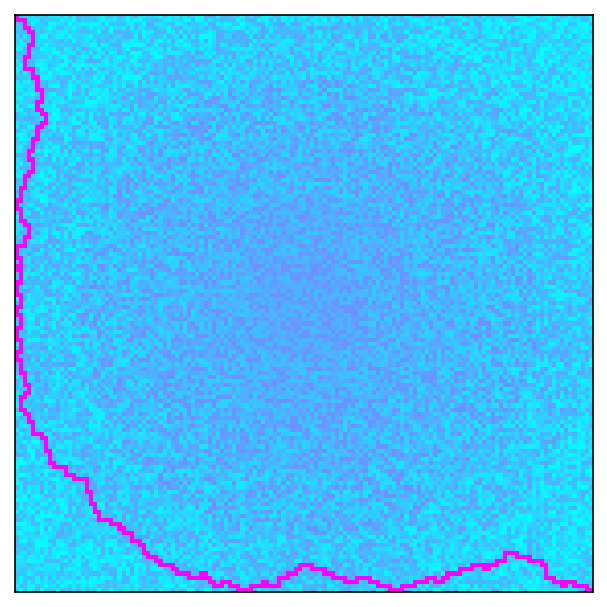

In [117]:
import matplotlib.pyplot as plt
import numpy as np

grid,xmax,ymax = readInput17("AOC2023inputs/input17.txt")

plot1 = np.zeros((ymax,xmax))

for x,y in grid.keys():
    plot1[y,x]=grid[(x,y)]

for x,y in path11:
    plot1[y,x]=20

fig = plt.figure(figsize=(5,5),dpi=150)
f = plt.imshow(plot1,cmap='cool')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)

In [119]:
def part2(infile):
    grid,xmax,ymax = readInput17(infile)
    S = (0,0)
    E = (xmax-1,ymax-1)
    heatloss,path = least_heat_loss(grid,S,E,max_moves=10,min_moves=4)
    return heatloss,path

In [120]:
heatloss20,path20 = part2("examples/example17.txt")
print("Test 1:",heatloss20)

heatloss21,path21 = part2("AOC2023inputs/input17.txt")
print("Part 1:",heatloss21)

Test 1: 94
Part 1: 1249


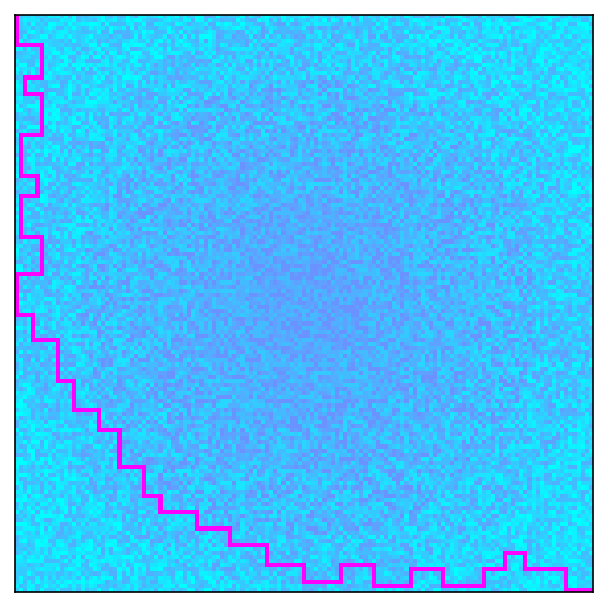

In [121]:
plot2 = np.zeros((ymax,xmax))

for x,y in grid.keys():
    plot2[y,x]=grid[(x,y)]

for x,y in path21:
    plot2[y,x]=20

fig = plt.figure(figsize=(5,5),dpi=150)
f = plt.imshow(plot2,cmap='cool')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)